# Preprocessing

In [1]:
import pickle
import os

import pandas as pd
pd.options.display.max_columns=100
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data=[]
for file in os.listdir():
    if file.endswith('.pickle') and 'all_info_dict' in file:
        data=pickle.load(open(file,'rb'))
        all_data.extend(data)

In [3]:
df=pd.DataFrame(all_data)
df=df.drop_duplicates(subset='URL').reset_index(drop=True)
df=df.dropna(subset=df.columns[1:],how='all')
df.to_csv('diamonds (raw).csv',index=False)

In [4]:
df.sample(3)

,URL,Stock Number,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Measurements,Price,Title,Fluorescence
2585,https://www.bluenile.com/diamond-details/22408880,22408880,Cushion Modified,Ideal,D,VVS2,2.38,1.03,67.6,63.0,Excellent,Excellent,Thin to Slightly Thick,None,7.68x7.46x5.04 mm,"$4,700",GIA Lab-Grown 2.38 Carat Cushion Modified Diamond,NaN
160,https://www.bluenile.com/diamond-details/22871831,22871831,Round,Excellent,H,VS2,1.00,1.01,62.9,57.0,Excellent,Very Good,Thin to Slightly Thick,None,6.29x6.37x3.98 mm,"$3,680",GIA 1.00 Carat Round Diamond,None
1126,https://www.bluenile.com/diamond-details/23139155,23139155,Marquise,NaN,E,VVS2,1.05,2.02,63.7,59.0,Excellent,Excellent,Medium to Slightly Thick,Pointed,10.5x5.21x3.32 mm,"$1,390",IGI Lab-Grown 1.05 Carat Marquise Diamond,None


In [5]:
df.isna().mean()*100

URL                    0.000000
Stock Number           0.215186
Shape                  0.215186
Cut                   66.400246
Color                  0.215186
Clarity                0.215186
Carat Weight           0.215186
Length/Width Ratio     0.215186
Depth %                0.245927
Table %                0.399631
Polish                 0.445742
Symmetry               0.445742
Girdle                 0.476483
Culet                  0.445742
Measurements           0.445742
Price                  0.322779
Title                  0.000000
Fluorescence          19.489702
dtype: float64

In [6]:
df.groupby('Shape')[['Cut','Fluorescence']].apply(lambda x:(x.isna().mean()*100).round())

#Percenatge of NaN values in Cut and Fluorescence by Shape

,Cut,Fluorescence
Shape,,
Cushion,0.0,3.0
Cushion Modified,0.0,75.0
Emerald,100.0,0.0
Heart,100.0,21.0
Marquise,100.0,8.0
Oval,100.0,10.0
Pear,100.0,15.0
Princess,0.0,16.0
Radiant,100.0,12.0


In [7]:
df.select_dtypes(object).nunique()

URL                   6506
Stock Number          6492
Shape                   11
Cut                      4
Color                    5
Clarity                  6
Carat Weight           254
Length/Width Ratio     132
Depth %                244
Table %                 38
Polish                   3
Symmetry                 3
Girdle                  29
Culet                    6
Measurements          6298
Price                  883
Title                  904
Fluorescence             4
dtype: int64

In [8]:
df['Carat Weight']=df['Carat Weight'].apply(pd.to_numeric)
df['Length/Width Ratio']=df['Length/Width Ratio'].apply(pd.to_numeric)
df['Depth %']=df['Depth %'].apply(pd.to_numeric)
df['Table %']=df['Table %'].apply(pd.to_numeric)

In [9]:
length=df['Measurements'].apply(lambda x:x.split('x')[0] if isinstance(x,str) else None).apply(pd.to_numeric)
width=df['Measurements'].apply(lambda x:x.split('x')[1] if isinstance(x,str) and x.count('x')==2 else None).apply(pd.to_numeric)
height=df['Measurements'].apply(lambda x:x.split('x')[-1].split(' ')[0] if isinstance(x,str) and x.count('x')==2 else None).apply(pd.to_numeric)

df.insert(df.columns.get_loc('Measurements')+1,'Length',length)
df.insert(df.columns.get_loc('Measurements')+2,'Width',width)
df.insert(df.columns.get_loc('Measurements')+3,'Height',height)

df=df.drop(columns='Measurements')

In [10]:
df['Price']=df['Price'].apply(lambda x:x.split('$')[-1].replace(',','') if isinstance(x,str) else None).apply(pd.to_numeric)
df=df.dropna(subset='Price')

In [11]:
df['Title']=df['Title'].apply(lambda x:' '.join(x.split('Carat')[0].split(' ')[:-2]) if isinstance(x,str) else None)
df=df.rename(columns={'Title':'Type'})

df=df.dropna(subset='Type')

In [12]:
df.to_csv('diamonds (cleaned).csv',index=False)

In [13]:
df=df.drop(columns=['URL','Stock Number'])

In [14]:
df.select_dtypes(object).nunique()

Shape           11
Cut              4
Color            5
Clarity          6
Polish           3
Symmetry         3
Girdle          29
Culet            6
Type             3
Fluorescence     4
dtype: int64

In [15]:
df.isna().agg(['mean','sum']).T
#NaN values

,mean,sum
Shape,0.000771,5.0
Cut,0.663531,4303.0
Color,0.000771,5.0
Clarity,0.000771,5.0
Carat Weight,0.000771,5.0
Length/Width Ratio,0.000771,5.0
Depth %,0.001079,7.0
Table %,0.002621,17.0
Polish,0.003084,20.0
Symmetry,0.003084,20.0


# EDA

In [16]:
df['Price Per Carat']=df['Price']/df['Carat Weight']

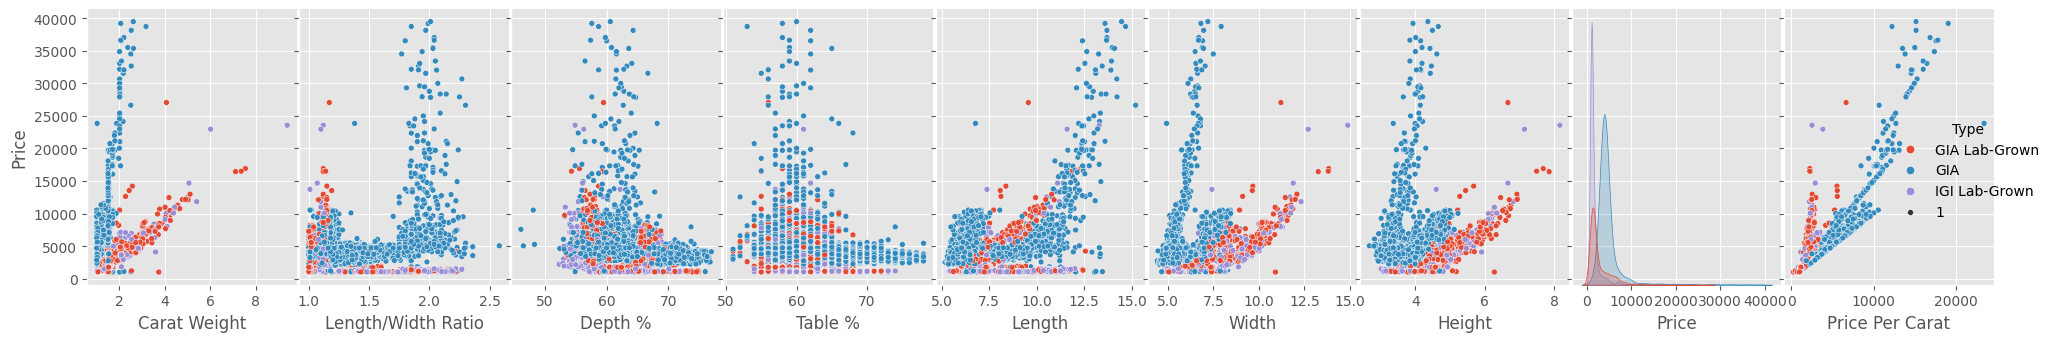

In [17]:
sns.pairplot(df,y_vars='Price',hue='Type',plot_kws={'size':1},height=10)
plt.gcf().set_size_inches(20, 3)  # Width, Height in inches
plt.show()


<Axes: title={'center': 'Share Of diamonds By Type'}>

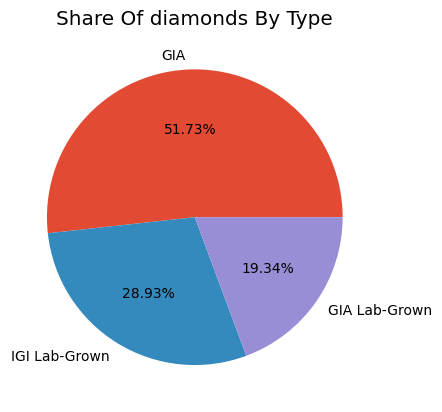

In [18]:
df['Type'].value_counts().plot.pie(autopct='%.2f%%',title='Share Of diamonds By Type',label='')

In [19]:
df[df['Type']=='GIA'].select_dtypes([int,float]).corr()['Price'].sort_values(ascending=False)

Price                 1.000000
Price Per Carat       0.929327
Carat Weight          0.828055
Length                0.592228
Length/Width Ratio    0.436310
Width                 0.267808
Height                0.137959
Table %              -0.200774
Depth %              -0.255190
Name: Price, dtype: float64

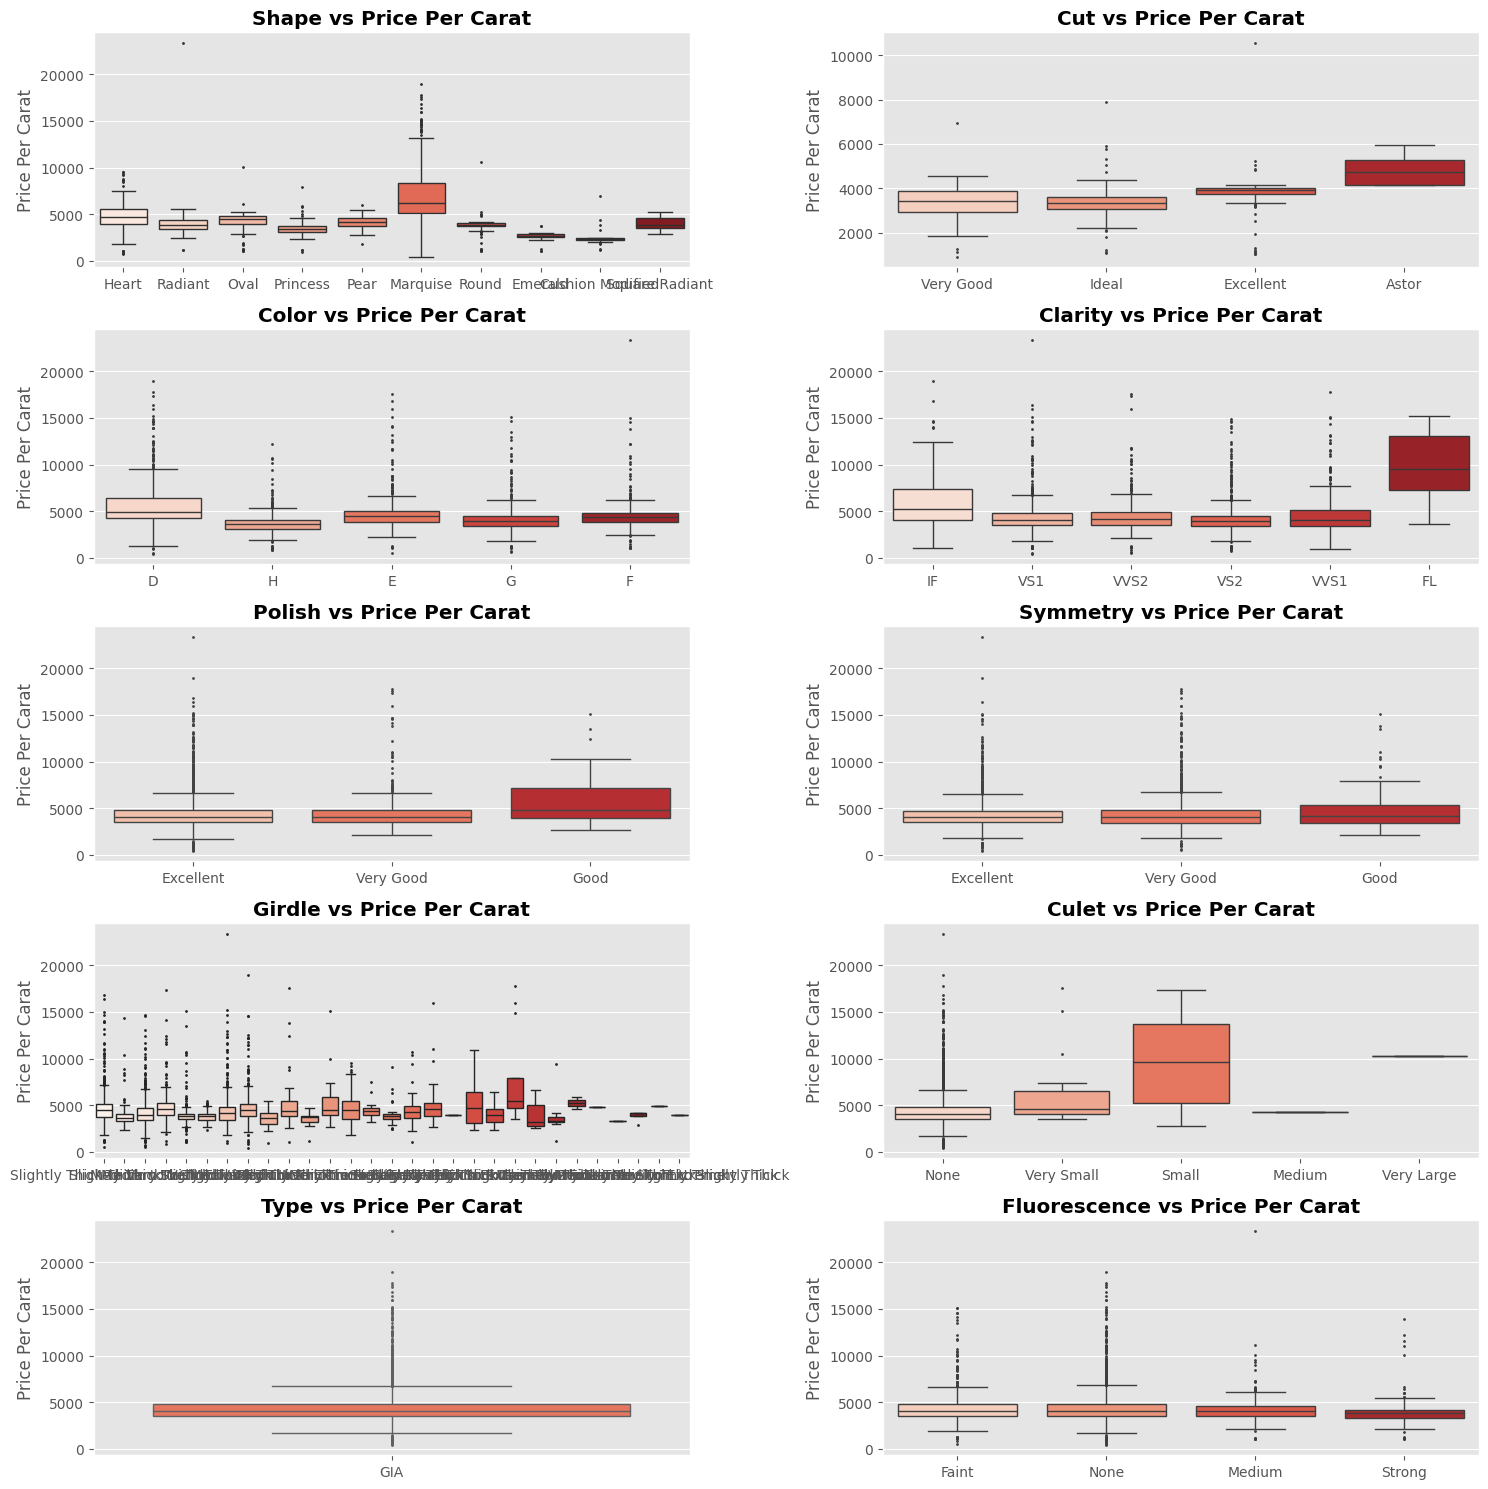

In [20]:
columns=df.select_dtypes(object).columns
fig, axes=plt.subplots(5,2,figsize=(15,15))

for col, ax in zip(columns, axes.flatten()):
    sns.boxplot(df[df['Type']=='GIA'],x=col,y='Price Per Carat',palette='Reds',flierprops=dict(marker='o', markerfacecolor='Blue', markersize=1),ax=ax)
    ax.set_title(f'{col} vs Price Per Carat',fontweight='bold')
    ax.set_xlabel(None)

plt.tight_layout()
plt.show()

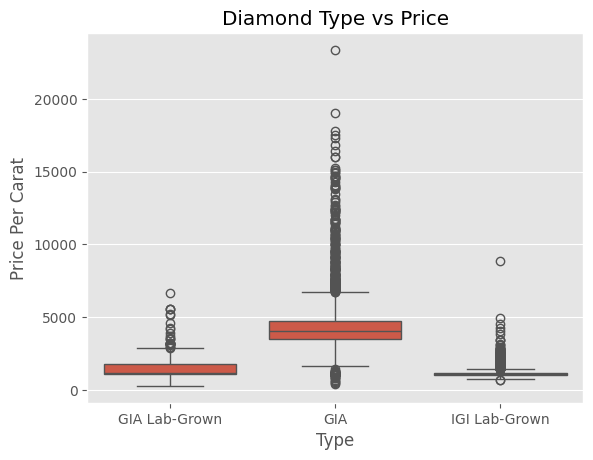

In [21]:
sns.boxplot(df,x='Type',y='Price Per Carat')
plt.title('Diamond Type vs Price')
plt.show()

In [22]:
df=df.drop(columns='Price Per Carat')

# ML

In [23]:
df['Girdle'].value_counts()[df['Girdle'].value_counts()<=3]
# rare values in Girdle

Girdle
Extremely Thin to Medium             2
Slightly Thick to Slightly Thick     1
Very Thin to Extremely Thick         1
Extremely Thin to Extremely Thick    1
Extremely Thin to Slightly Thick     1
Name: count, dtype: int64

In [24]:
rare_labels=list(df['Girdle'].value_counts()[df['Girdle'].value_counts()<=3].index)
df['Girdle']=df['Girdle'].apply(lambda x:'Rare Label' if str(x) in rare_labels else x)

In [25]:
#transfrom to dummy variables

for col in df.select_dtypes(object):
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=False)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

df[df.filter(like='Type_').columns]=df.filter(like='Type_')*5
df.filter(like='Type_')

In [26]:
X=df.drop(columns='Price')
y=df['Price']

from sklearn.model_selection import train_test_split

for i in range(1001):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df.filter(regex='Type_|Cut_'))
        break
    except:
        continue

In [27]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

from xgboost import XGBRegressor
model=XGBRegressor()


In [28]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='neg_root_mean_squared_error',
        verbose=1
    )
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve for XGBoost Classifier')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[learning_curve] Training set sizes: [ 345  691 1037 1383 1729 2074 2420 2766 3112 3458]


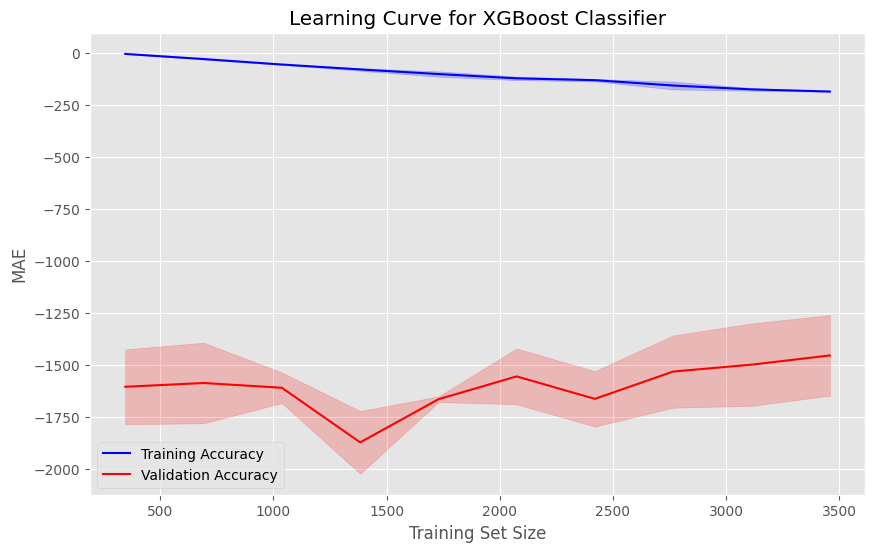

In [29]:
plot_learning_curve(XGBRegressor()) #initial model

from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}

grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=10)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

In [30]:
#with open('best_ml_model.pickle', 'wb') as file:
#    pickle.dump(best_model, file)

with open('best_ml_model.pickle', 'rb') as file:
    best_model = pickle.load(file)

[learning_curve] Training set sizes: [ 345  691 1037 1383 1729 2074 2420 2766 3112 3458]


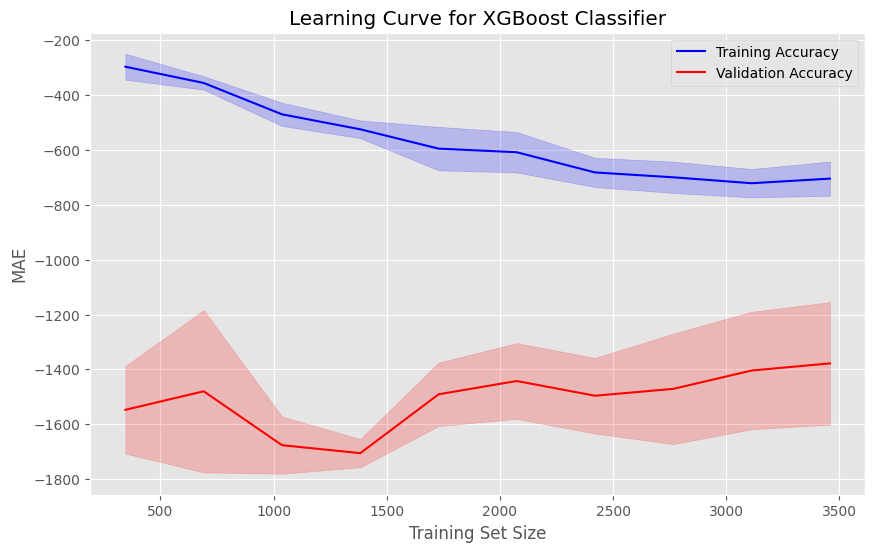

In [31]:
plot_learning_curve(best_model)

In [32]:
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)

In [34]:
from sklearn import metrics

r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
mdae_train=metrics.median_absolute_error(train_prediction,y_train)
mdae_test=metrics.median_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'MDAE_train':mdae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'MDAE_test':mdae_test,'RMSE_test':rmse_test}

print(train_scores)
print(test_scores)

{'R2_train': 0.9349925149449088, 'MAE_train': np.float64(356.7339374480472), 'MDAE_train': np.float64(139.685302734375), 'RMSE_train': np.float64(782.9121141790408)}
{'R2_test': 0.8310241999320472, 'MAE_test': np.float64(477.68779016405045), 'MDAE_test': np.float64(163.02001953125), 'RMSE_test': np.float64(1245.36596630966)}


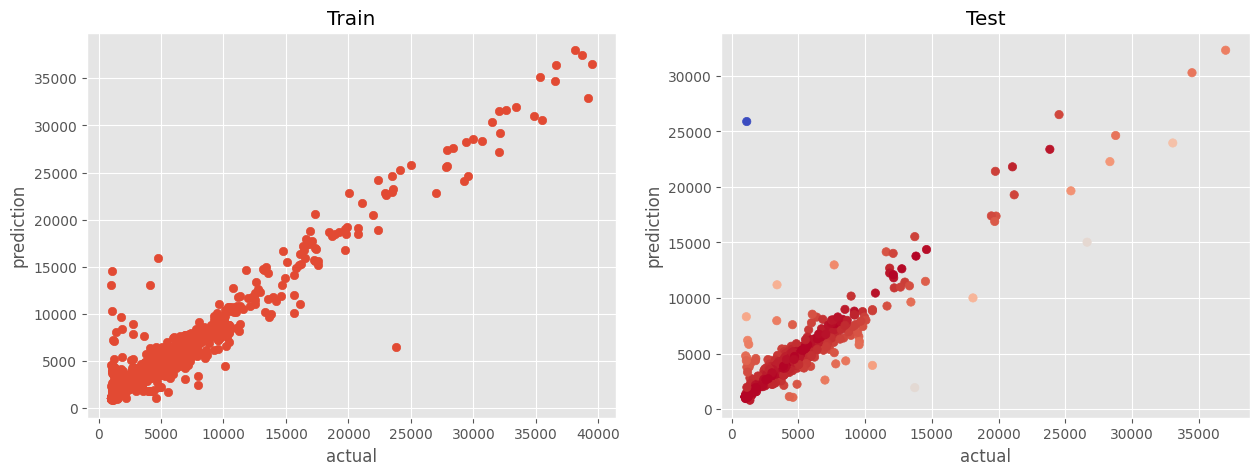

In [35]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('actual')
ax1.set_ylabel('prediction')
ax1.set_title('Train')
ax2.scatter(y_test,test_prediction,c=(y_test-test_prediction).abs(),cmap='coolwarm_r')
ax2.set_xlabel('actual')
ax2.set_ylabel('prediction')
ax2.set_title('Test')

    
plt.show()

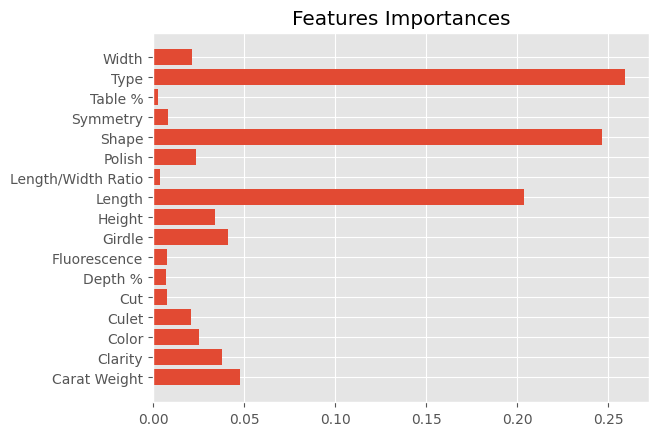

In [36]:
feature_names=best_model.feature_names_in_
weights=best_model.feature_importances_

weights_df=pd.DataFrame({'feature_names':feature_names,'weights':weights})
weights_df_grouped=weights_df.groupby(weights_df['feature_names'].str.split('_').str[0])['weights'].sum()

plt.barh(y=weights_df_grouped.index,width=weights_df_grouped.values)
plt.title('Features Importances')
plt.show()

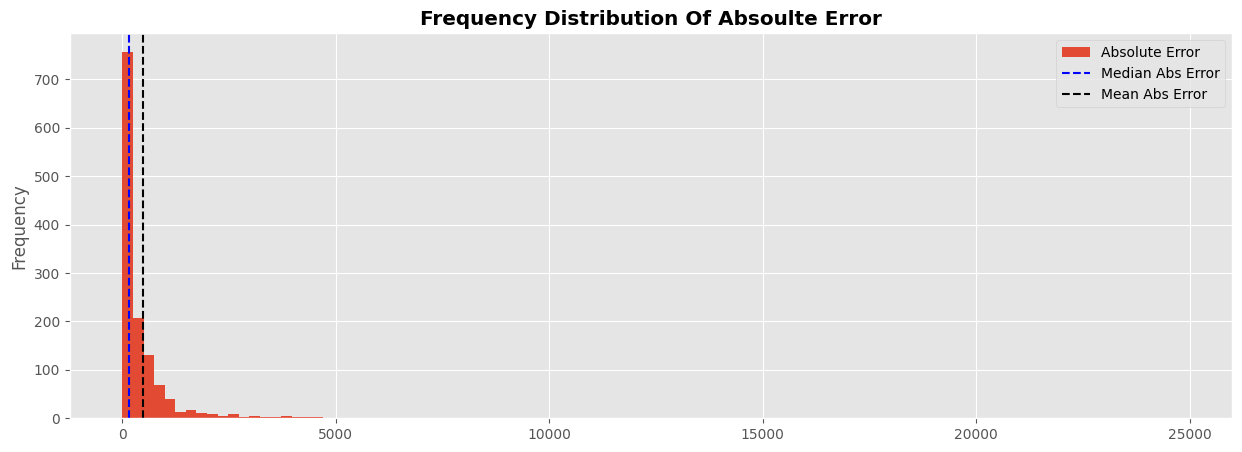

In [37]:
absolute_error=(y_test-test_prediction).abs()

fig,ax=plt.subplots(figsize=(15,5))
absolute_error.plot.hist(ax=ax,bins=100,label='Absolute Error')
ax.set_title('Frequency Distribution Of Absoulte Error',fontweight='bold')
median_abs_error=absolute_error.median()
ax.axvline(median_abs_error,label='Median Abs Error',color='blue',ls='--')
ax.axvline(mae_test,label='Mean Abs Error',color='black',ls='--')
ax.legend()
plt.show()

In [38]:
X_test_new=X_test.copy()

dummie_column_keywords=[f'{col}_' for col in list(set(df.filter(like='_').columns.str.split('_').str[0]))]
for dummie_column_keyword in dummie_column_keywords:
    dummie_columns=X_test_new.columns[X_test_new.columns.str.contains(dummie_column_keyword)]
    dummie_to_series=X_test_new[dummie_columns].idxmax(axis=1).str.replace(dummie_column_keyword,'')
    dummie_to_series_df=pd.DataFrame({dummie_column_keyword:dummie_to_series})
    X_test_new=X_test_new.drop(columns=dummie_columns)
    X_test_new=pd.concat([X_test_new,dummie_to_series_df],axis=1)


X_test_new['Absolute Error']=absolute_error

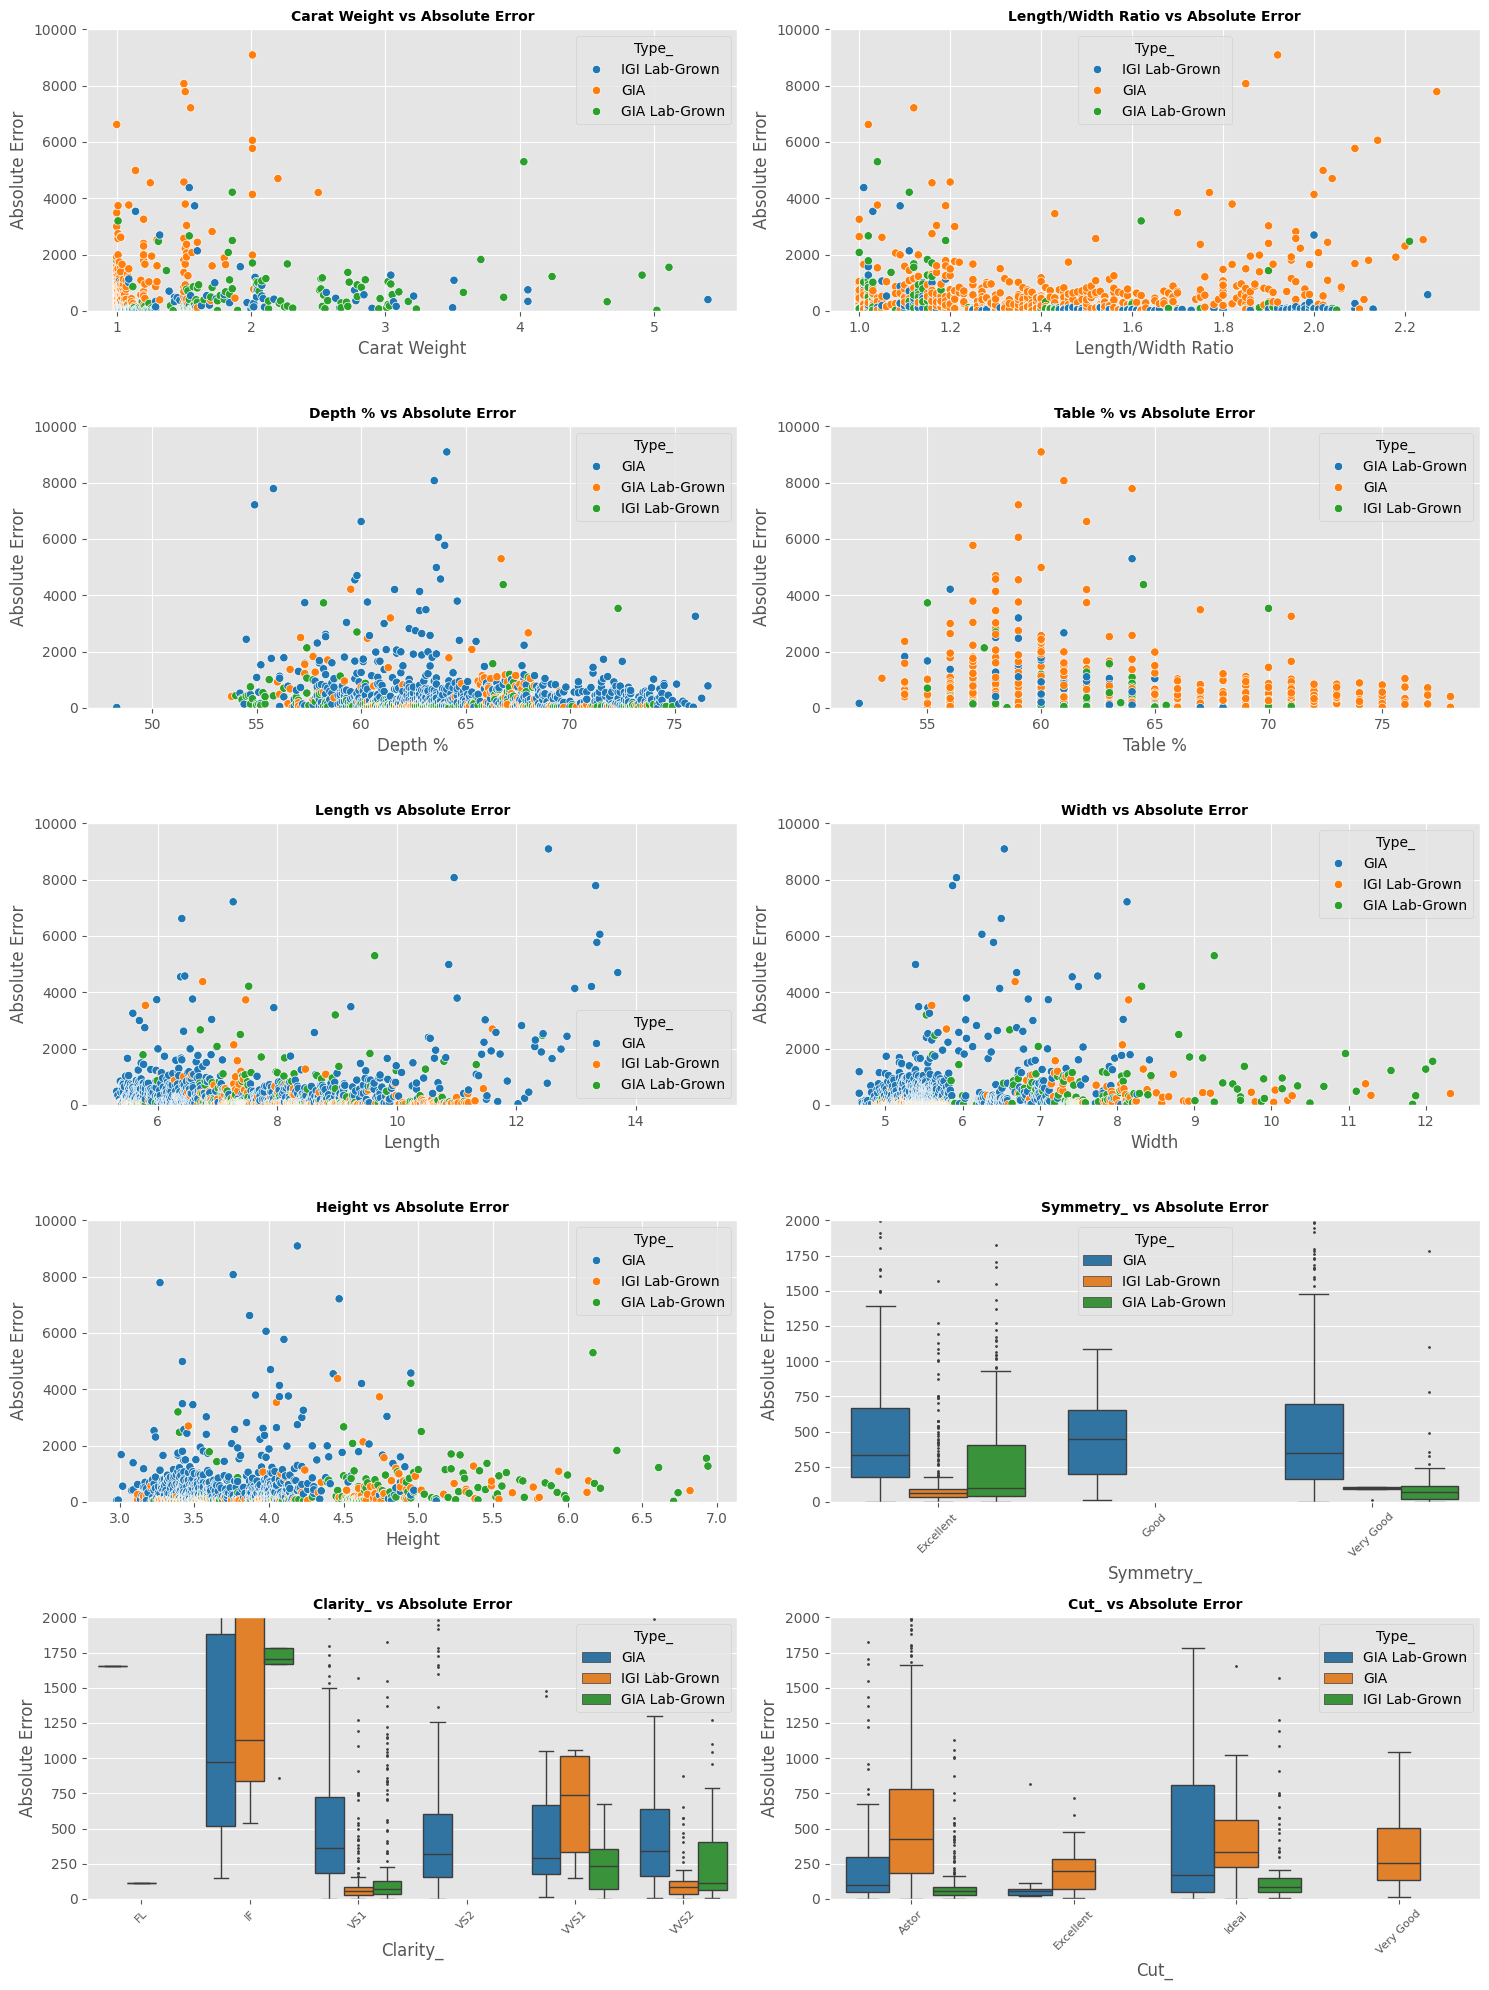

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for col, ax in zip(X_test_new.columns, axes.ravel()):
    X_test_new = X_test_new.sort_values(col)
    
    if X_test_new[col].nunique() <= 25:
        sns.boxplot(
            x=col,
            y='Absolute Error',
            hue='Type_',
            data=X_test_new,
            ax=ax,
            palette='tab10',
            flierprops=dict(markersize=1)
        )
        ax.set_title(f'{col} vs Absolute Error', fontweight='bold', size=10)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45,size=8)
        ax.set_ylim(0,2000)
    else:
        sns.scatterplot(
            x=col,
            y='Absolute Error',
            hue='Type_',
            data=X_test_new,
            ax=ax,
            palette='tab10',
            #alpha=0.7
        )
        ax.set_title(f'{col} vs Absolute Error', fontweight='bold', size=10)
        ax.set_ylim(0,10000)
plt.tight_layout()
plt.show()


In [40]:
#predicting with RandomForestRegressor Model

rfr_model=RandomForestRegressor()

rfr_model.fit(X_train,y_train)


train_prediction=rfr_model.predict(X_train)
test_prediction=rfr_model.predict(X_test)



r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
mdae_train=metrics.median_absolute_error(train_prediction,y_train)
mdae_test=metrics.median_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'MDAE_train':mdae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'MDAE_test':mdae_test,'RMSE_test':rmse_test}

print(train_scores)
print(test_scores)

{'R2_train': 0.9743284665004058, 'MAE_train': np.float64(156.1249107219346), 'MDAE_train': np.float64(45.35000000000002), 'RMSE_train': np.float64(493.5912608839298)}
{'R2_test': 0.8251858442385285, 'MAE_test': np.float64(455.0678981410092), 'MDAE_test': np.float64(138.30000000000018), 'RMSE_test': np.float64(1274.5911681395717)}
